import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np

import project functions

In [2]:
from src.generalFunctions import *

data

In [3]:
points_geo = pd.read_csv('df_resolute_CLEANED_4IQR_4PREP.csv')

In [4]:
# sns.pairplot(points_geo.select_dtypes(include=['int64','float64']))

predicting field

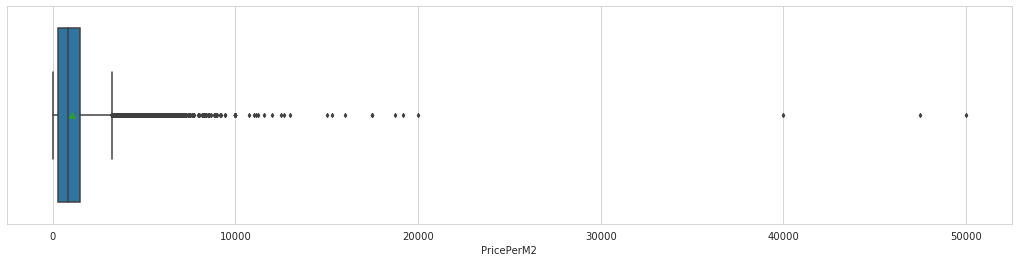

In [5]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x = 'PricePerM2', data = points_geo, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

clearly there are still outliers

In [6]:
points_geo = iqr_filter(points_geo, 'PricePerM2')[0]

Number of rows dropped: 2133


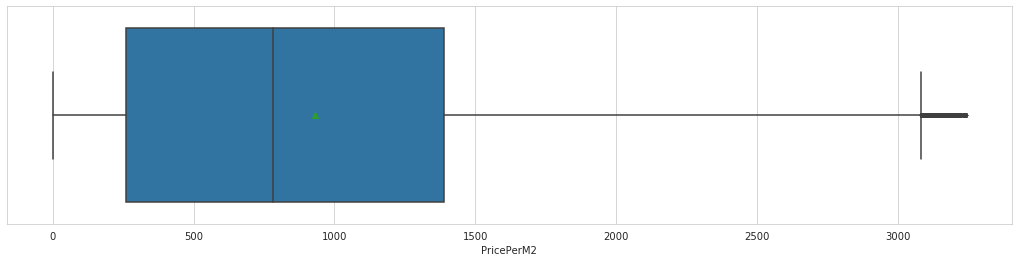

In [7]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x = 'PricePerM2', data = points_geo, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [8]:
top_PropertyTy_values = points_geo.PropertyTy.value_counts(sort=True).head(10).index.tolist()

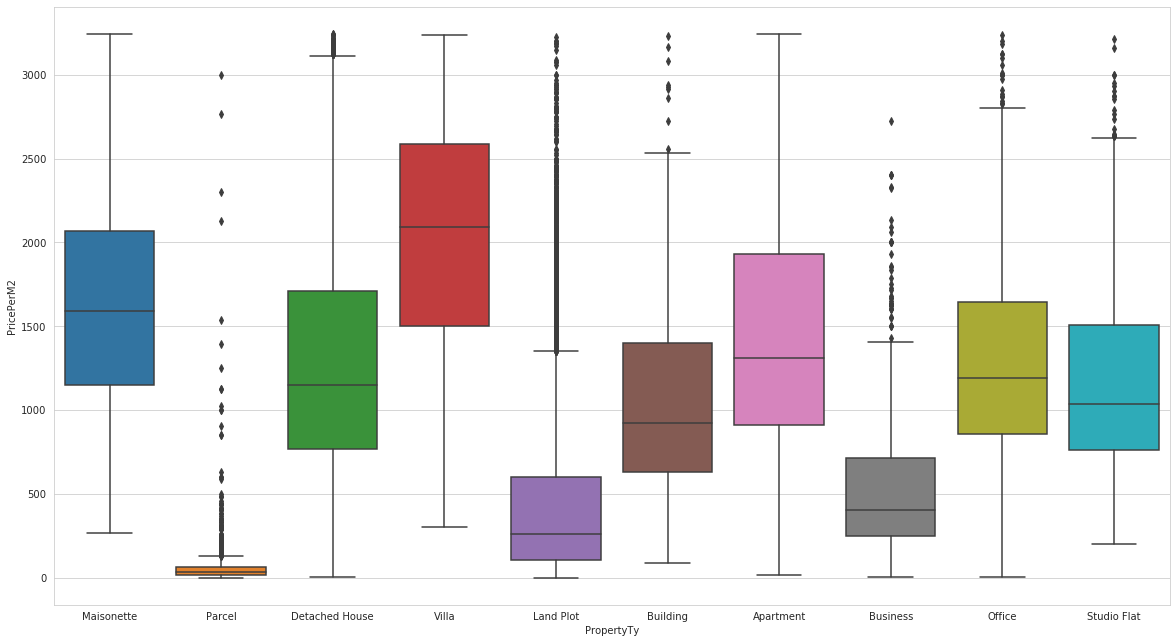

In [9]:
fig, ax = pyplot.subplots(figsize=(20,11))
sns.boxplot(x=points_geo['PropertyTy'][points_geo['PropertyTy'].isin(top_PropertyTy_values)],\
            y=points_geo['PricePerM2'])

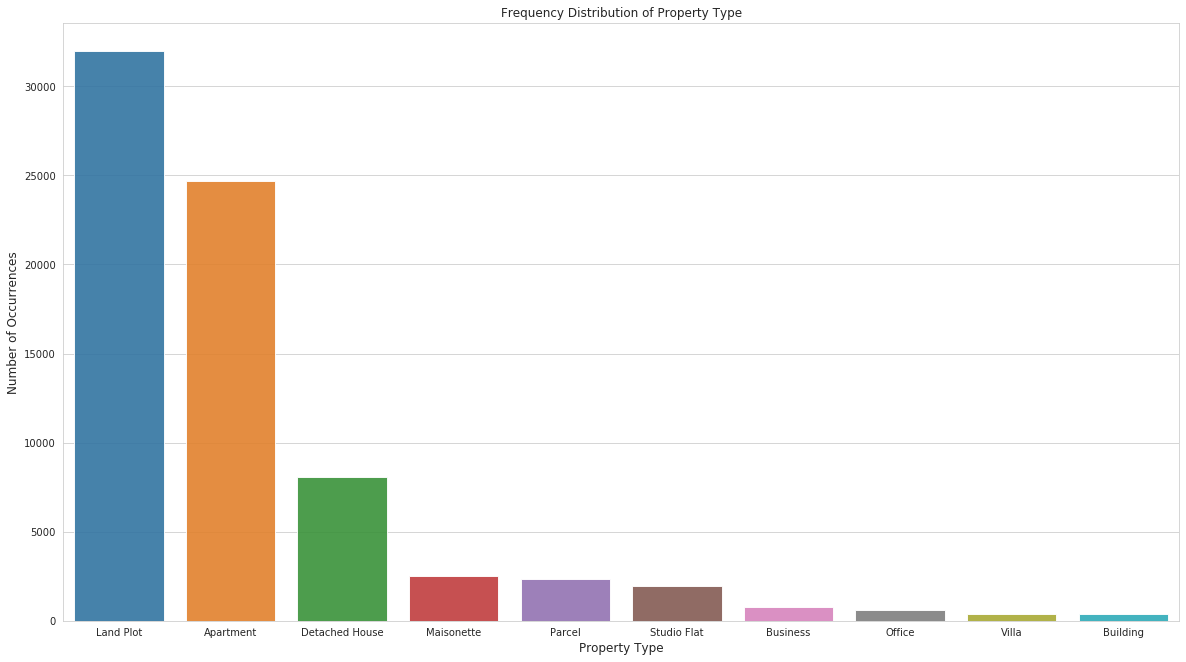

In [10]:
points_geo_count = points_geo.PropertyTy.value_counts(sort=True).head(10)

fig, ax = pyplot.subplots(figsize=(20,11))
sns.barplot(points_geo_count.index, points_geo_count.values, alpha=0.9)

plt.title('Frequency Distribution of Property Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Property Type', fontsize=12)
plt.show()

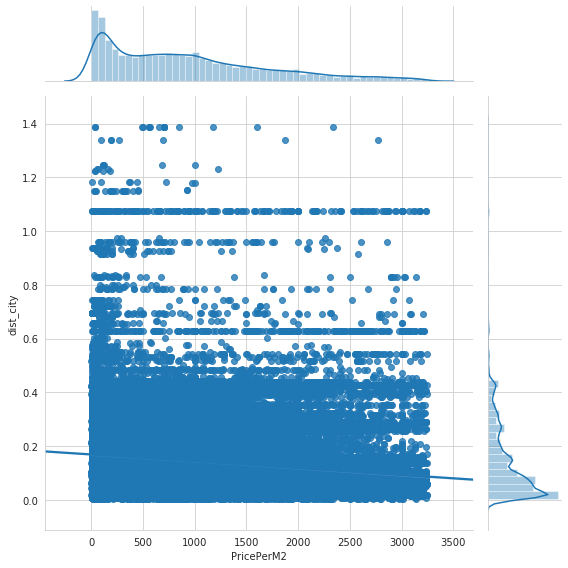

In [74]:
sns.jointplot(x=points_geo['PricePerM2'], y=points_geo['dist_city'], kind='reg',height=8)

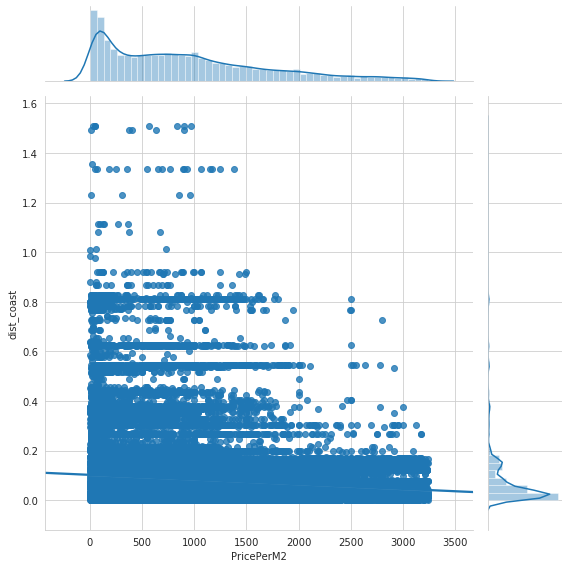

In [12]:
sns.jointplot(x=points_geo['PricePerM2'], y=points_geo['dist_coast'], kind='reg',height=8)

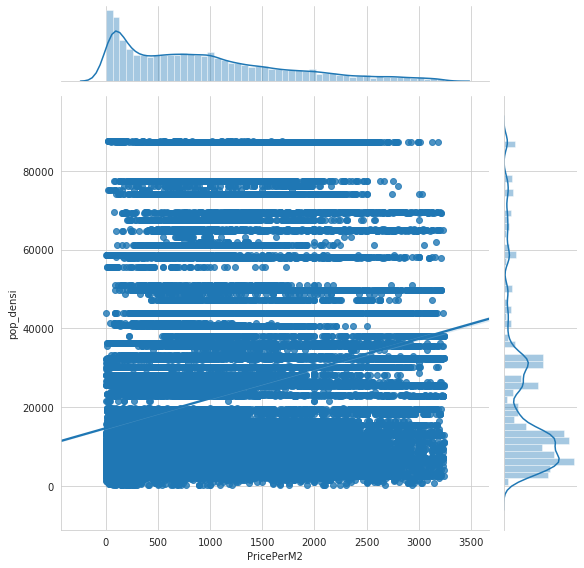

In [13]:
sns.jointplot(x=points_geo['PricePerM2'], y=points_geo['pop_densi'], kind='reg',height=8)

### constructi 

In [24]:
# replace values and fill missing ones
points_geo['construction'] = 0

points_geo['construction'] = points_geo['Constructi']\
            .apply(lambda x: 2019 if (x =='Under construction') | (x =='-') else x)

points_geo['construction'] = points_geo['construction'].fillna(value=0)
points_geo['construction'] = points_geo['construction'].astype(int)
median_construction = np.median([x for x in points_geo['construction'].unique() if x!=0])
points_geo['construction'] = points_geo['construction']\
                    .apply(lambda x: median_construction if x ==0 else x)
points_geo['construction'] = points_geo['construction'].astype(int)

points_geo.drop(['Constructi'], axis=1, inplace=True)

### save to csv 

In [25]:
# points_geo.to_csv('df_resolute_CLEANED_4IQR_4PREP_priceperm2IQR.csv', index=False)

### time analysis 

In [27]:
points_geo.Year.unique()

array([2019, 2018, 2016, 2017, 2015, 2010, 2014, 2012, 2009, 2011, 2013])

In [28]:
points_geo_ts = points_geo.set_index('ModifiedOn').sort_index()
points_geo_ts.index = pd.to_datetime(points_geo_ts.index)

In [29]:
replace_dict = {'residential':['Apartment', 'Detached House', 'Maisonette', 'Studio Flat', 'Villa',
               'Garage', 'Other Residential Properties Types', 'Apartment complex',
              'Bungalow', 'Loft', 'Detachable', 'Prefabricated'],
                'land':['Land Plot', 'Parcel', 'Other Land Types'],
                'business':['Business', 'Office', 'Other Commercial Properties Types', 'Hotel'],
                'other':['Building', 'Business building', 'Other Properties', 'Warehouse',
            'Industrial space', 'Craft space', 'Hall', 'Air', 'Island', 'Farm']}

points_geo_ts['property'] = None
points_geo_ts['property'] = points_geo_ts['PropertyTy']\
                .apply(lambda x: [key for key, value in replace_dict.items() if x in value][0] )
points_geo_ts.drop(['PropertyTy'], axis=1, inplace=True)

In [44]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['PriceEuro', 'PricePerM2']
# Resample to weekly frequency, aggregating with mean
points_geo_ts_monthly_mean = points_geo_ts[data_columns].resample('M').mean()
points_geo_ts_monthly_median = points_geo_ts[data_columns].resample('M').median()

RESI_points_geo_ts_monthly_median = points_geo_ts.query("property=='residential'")[data_columns].resample('M').median()
LAND_points_geo_ts_monthly_median = points_geo_ts.query("property=='land'")[data_columns].resample('M').median()
BUSI_points_geo_ts_monthly_median = points_geo_ts.query("property=='business'")[data_columns].resample('M').median()
OTHER_points_geo_ts_monthly_median = points_geo_ts.query("property=='other'")[data_columns].resample('M').median()

points_geo_ts_monthly_mean.head(3)

,PriceEuro,PricePerM2
ModifiedOn,,
2015-12-31,11000.0,129.0
2016-01-31,NaN,NaN
2016-02-29,NaN,NaN


In [20]:
# points_geo_ts_monthly_mean['PricePerM2'].loc['2016-01-01':'2019-04-30'].plot(linewidth=1,grid=True)

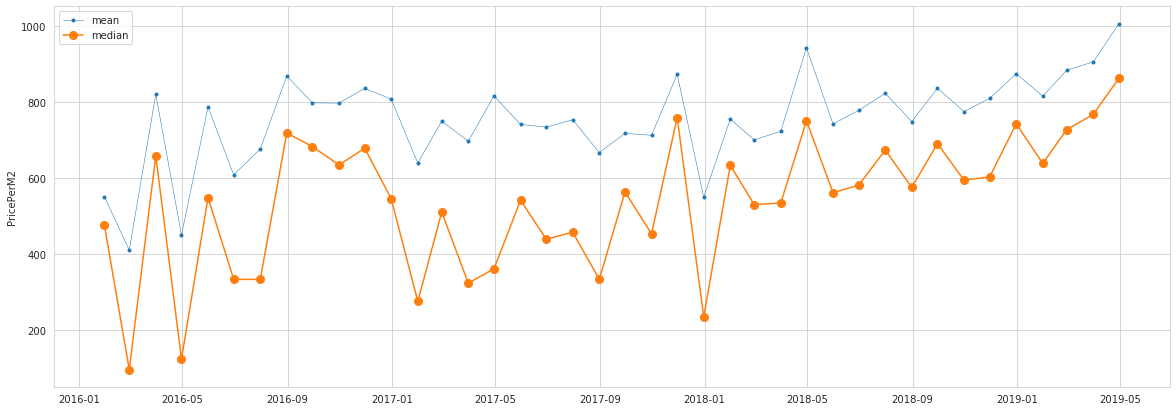

In [21]:
column = 'PricePerM2'

# Start and end of the date range to extract
start, end = '2016-01-01', '2019-04-30'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(points_geo_ts_monthly_mean[column].loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='mean')

ax.plot(points_geo_ts_monthly_median[column].loc[start:end],
marker='o', markersize=8, linestyle='-', label='median')


ax.set_ylabel(column)
ax.legend()

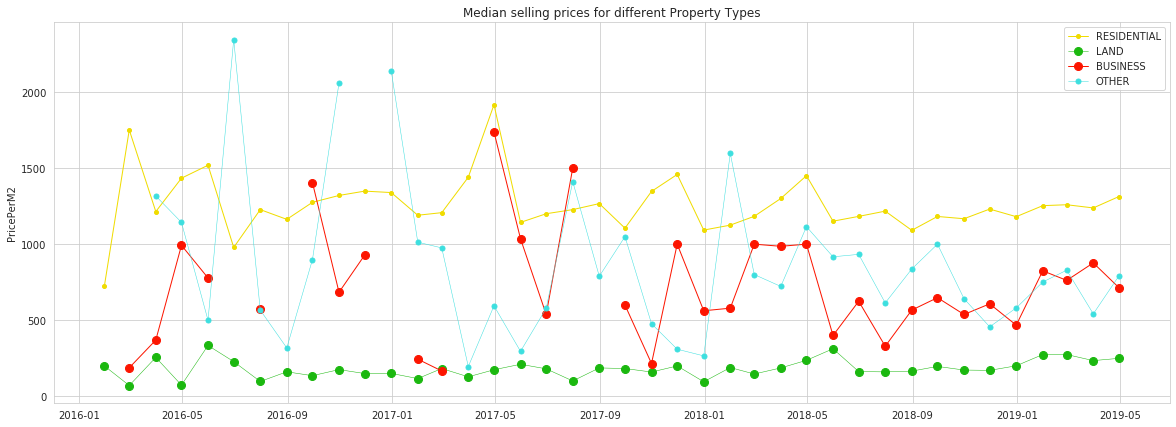

In [62]:
column = "PricePerM2"

# Start and end of the date range to extract
start, end = '2016-01-01', '2019-04-30'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(RESI_points_geo_ts_monthly_median[column].loc[start:end],
marker='.',markersize=8, linestyle='-', linewidth=1, color= '#f0dc00', label='RESIDENTIAL')

ax.plot(LAND_points_geo_ts_monthly_median[column].loc[start:end],
marker='o', markersize=8, linestyle='-', linewidth=0.5, color='#1bb80f', label='LAND')

ax.plot(BUSI_points_geo_ts_monthly_median[column].loc[start:end],
marker='o', markersize=8, linestyle='-', linewidth=1,color='#fc1500', label='BUSINESS')

ax.plot(OTHER_points_geo_ts_monthly_median[column].loc[start:end],
marker='o', markersize=5, linestyle='-', linewidth=0.5,color='#3ddfdf', label='OTHER')

plt.title('Median selling prices for different Property Types')
ax.set_ylabel(column)
ax.legend()

In [64]:
points_geo.Year.value_counts(sort=True)

2019    59274
2018    11445
2017     3412
2016     1470
2015      334
2014       25
2012       24
2011        7
2013        5
2010        3
2009        1
Name: Year, dtype: int64

In [65]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
points_geo_ts_monthly = points_geo_ts[data_columns].resample('M').size()
points_geo_ts_monthly.head()

ModifiedOn
2009-05-31    1
2009-06-30    0
2009-07-31    0
2009-08-31    0
2009-09-30    0
Freq: M, dtype: int64

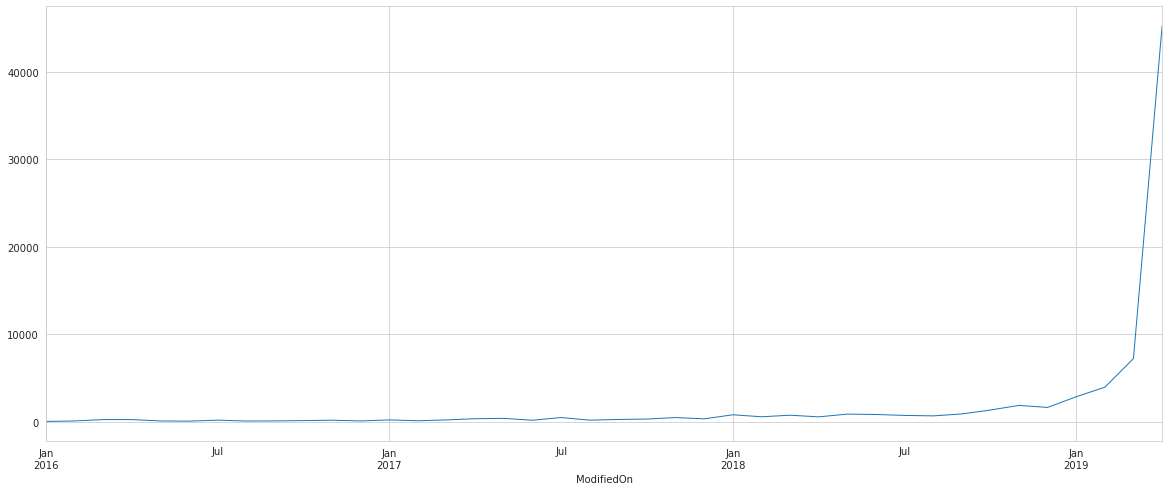

In [72]:
fig, ax = pyplot.subplots(figsize=(20,8))
points_geo_ts_monthly.loc['2016-01-01':'2019-04-30'].plot(linewidth=1,grid=True)